#Importing important Libraries

In [31]:
# Importing important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

#Read the csv file

In [32]:
# Read the csv file
df=pd.read_csv(r"C:\Users\Sahil\OneDrive\Desktop\New folder (5)\Downloads\framingham.csv")

In [33]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#Exploratory Data Visualization

<Axes: xlabel='education', ylabel='count'>

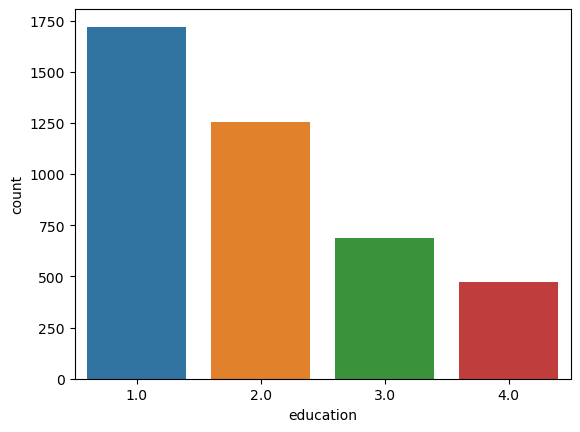

In [34]:
# Countplot of the 'education' column
sns.countplot(x='education',data=df)

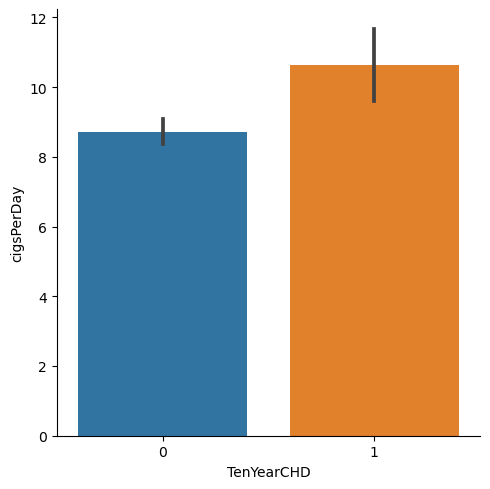

In [35]:
# Bar plot of 'cigsPerDay' vs 'TenYearCHD'
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=df)

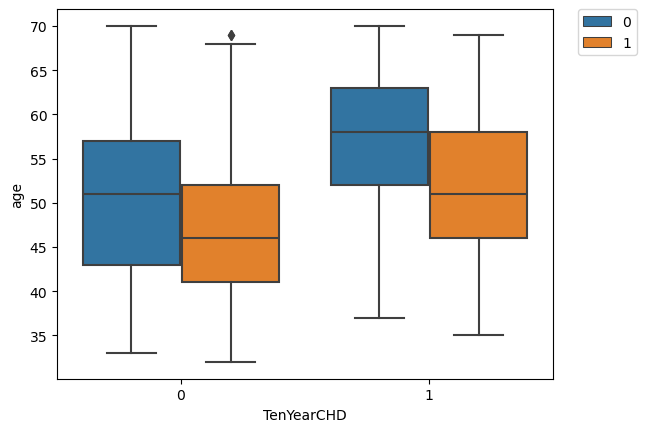

In [36]:
# Box plot of 'age' vs 'TenYearCHD' with hue 'currentSmoker'
sns.boxplot(x='TenYearCHD', y='age', hue='currentSmoker', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


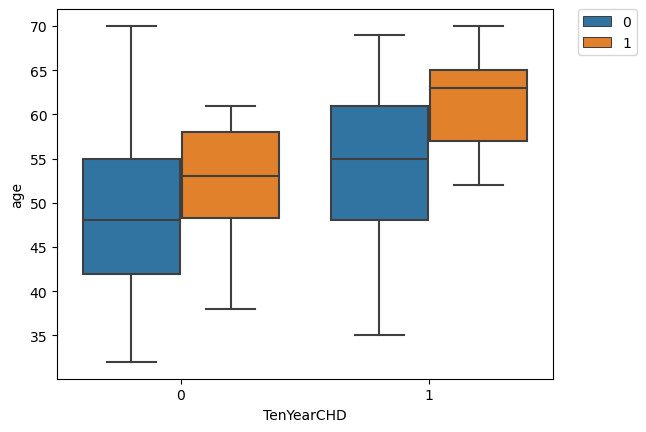

In [37]:
# Box plot of 'age' vs 'TenYearCHD' with hue 'prevalentStroke'
sns.boxplot(x='TenYearCHD', y='age', hue='prevalentStroke', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


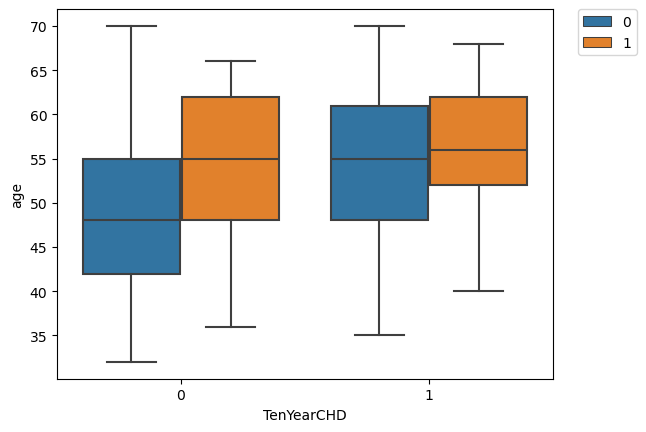

In [38]:
# Box plot of 'age' vs 'TenYearCHD' with hue 'diabetes'
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)



(80.0, 725.45)

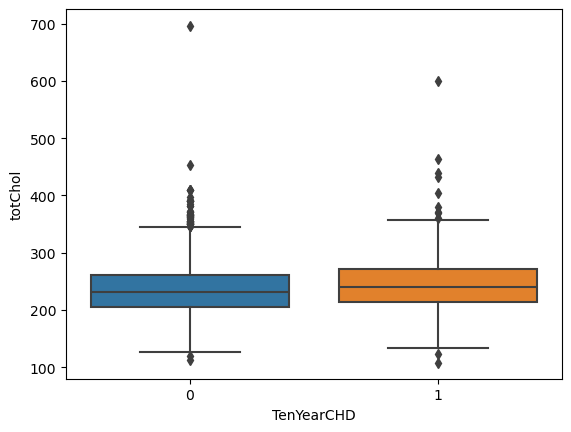

In [39]:
# Box plot of 'totChol' vs 'TenYearCHD'
sns.boxplot(x='TenYearCHD',y='totChol',data=df)
plt.ylim(80)

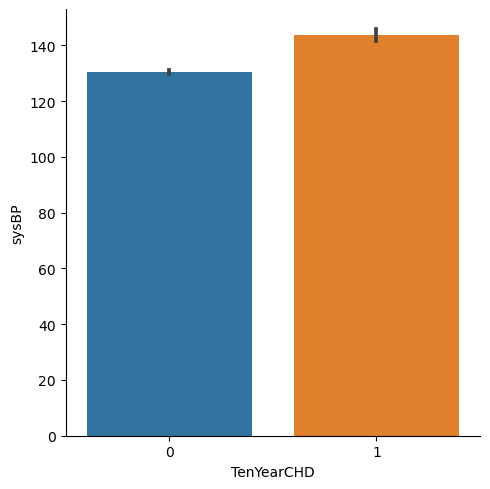

In [40]:
# Bar plot of 'sysBP' vs 'TenYearCHD'
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=df)

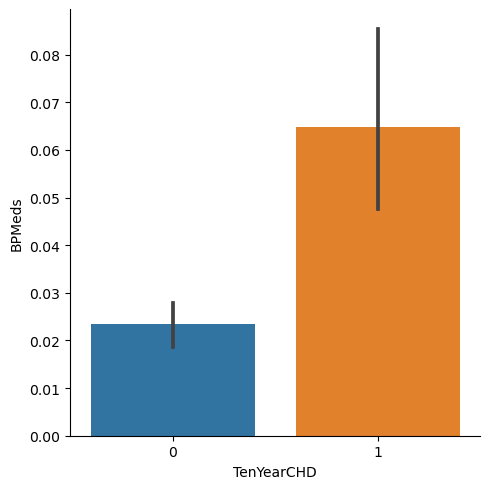

In [41]:
# Bar plot of 'BPMeds' vs 'TenYearCHD'
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=df)

#Data preprocessing

In [42]:
# Check for missing values
df.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [43]:
# Drop rows with missing values
df=df.dropna()

In [44]:
# Confirm there are no more missing values
df.isnull().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [45]:
# Check the distribution of the target variable 'TenYearCHD'
df['TenYearCHD'].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

In [46]:
#Baseline accuracy
# Assuming 3101 and 557 are the counts of class 0 and 1 in 'TenYearCHD' respectively
3101/(3101+557)

0.8477310005467469

#Train-test split

In [47]:
# Train-test split

In [48]:
# Define features (X) and target (y)
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [49]:

# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)

In [50]:


# Define the pipeline with logistic regression
pipeline = Pipeline(steps=[
    
    ('classifier', LogisticRegression())
])

In [51]:

# Fit the model on the training data
pipeline.fit(x_train,y_train)

C:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier', LogisticRegression())])

#Make prdictions on the tested data

In [52]:
# Make predictions on the test data
pipepred=pipeline.predict(x_test)

#Evaluating the Model

In [53]:
# Evaluating the Model

# Print classification report
print(classification_report(y_test,pipepred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1079
           1       0.67      0.07      0.13       202

    accuracy                           0.85      1281
   macro avg       0.76      0.53      0.52      1281
weighted avg       0.82      0.85      0.79      1281



In [54]:
# Calculate and print accuracy score
accuracy_score(y_test,pipepred)

0.8477751756440282